In [1]:
import pandas as pd

# Load your CSV
sentiment_df = pd.read_csv("Sentiment Analysis.csv")

# Drop unwanted column
if 'Unnamed: 0' in sentiment_df.columns:
    sentiment_df = sentiment_df.drop(columns=['Unnamed: 0'])

# Convert date column
sentiment_df['Date Created'] = pd.to_datetime(sentiment_df['Date Created'], errors='coerce')

# Verify cleaned dataframe
print("Columns after cleaning:", sentiment_df.columns.tolist())
print(sentiment_df.head())
print("Shape:", sentiment_df.shape)


Columns after cleaning: ['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Sentiment']
               Date Created  Number of Likes      Source of Tweet  \
0 2022-11-20 23:59:21+00:00                4      Twitter Web App   
1 2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2 2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3 2022-11-20 23:58:33+00:00                1      Twitter Web App   
4 2022-11-20 23:58:28+00:00                0  Twitter for Android   

                                               Tweet Sentiment  
0  What are we drinking today @TucanTribe \n@MadB...   neutral  
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive  
2  Worth reading while watching #WorldCup2022 htt...  positive  
3  Golden Maknae shinning bright\n\nhttps://t.co/...  positive  
4  If the BBC cares so much about human rights, h...  negative  
Shape: (22524, 5)


In [2]:
# Step 2: Sentiment Distribution
sentiment_counts = sentiment_df['Sentiment'].value_counts()

print("=== Sentiment Distribution ===")
print(sentiment_counts)

# Convert to DataFrame for saving
sentiment_summary = sentiment_counts.reset_index()
sentiment_summary.columns = ['Sentiment', 'Count']
print(sentiment_summary)


=== Sentiment Distribution ===
Sentiment
positive    8489
neutral     8251
negative    5784
Name: count, dtype: int64
  Sentiment  Count
0  positive   8489
1   neutral   8251
2  negative   5784


In [3]:
# Step 3: Sentiment Trend over Time
sentiment_trend = (
    sentiment_df.groupby([sentiment_df['Date Created'].dt.date, 'Sentiment'])
    .size()
    .reset_index(name='Count')
)

print("=== Sentiment Trend ===")
print(sentiment_trend.head())


=== Sentiment Trend ===
  Date Created Sentiment  Count
0   2022-11-20  negative   5784
1   2022-11-20   neutral   8251
2   2022-11-20  positive   8489


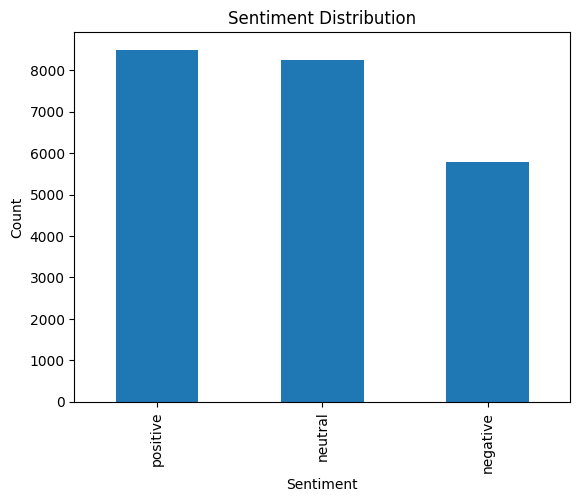

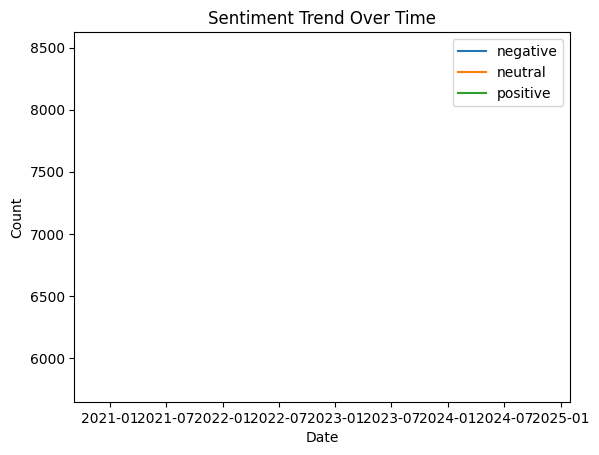

In [4]:
import matplotlib.pyplot as plt

# Bar chart for distribution
sentiment_counts.plot(kind='bar', title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Line chart for trend
for sentiment in sentiment_trend['Sentiment'].unique():
    subset = sentiment_trend[sentiment_trend['Sentiment'] == sentiment]
    plt.plot(subset['Date Created'], subset['Count'], label=sentiment)

plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


In [5]:
sentiment_df.to_csv("sentiment_cleaned.csv", index=False)
sentiment_summary.to_csv("sentiment_summary.csv", index=False)
sentiment_trend.to_csv("sentiment_trend.csv", index=False)

print("✅ Week 5 outputs saved successfully.")


✅ Week 5 outputs saved successfully.


In [6]:
# WEEK 5 - SENTIMENT + MARKET VALUES
sentiment_df = pd.read_csv("Sentiment Analysis.csv")
if 'Unnamed: 0' in sentiment_df.columns:
    sentiment_df = sentiment_df.drop(columns=['Unnamed: 0'])
sentiment_df['Date Created'] = pd.to_datetime(sentiment_df['Date Created'], errors='coerce')

transfer_df = pd.read_csv("transfermarkt_market_values.csv")
print("Transfer Data:", transfer_df.shape)
print(transfer_df.head())


Transfer Data: (25, 5)
   Name                Age  Nationality    Club  Market Value
0   NaN   Alessandro Riggi          NaN  Canada            31
1   NaN  Christian Pastina          NaN   Italy            24
2   NaN    Abdullo Dzhebov          NaN  Russia            21
3   NaN   Daniil Stolyarov          NaN  Russia            22
4   NaN       Semen Fadeev          NaN  Russia            20
